# Intro to Data Science Workshop
## From Data Acquisition to a linear regression model to interpreting the model


## Data Science Workflow
1. **Plan** - What is the business case? What is your test hypothesis? What are you trying to prove or disprove?
2. **Acquire** - Get access to the data or download the data
3. **Prepare** - Data cleaning/wrangling, handle missing values. 
4. **Explore** - Explore, visualize, and deep dive on what stories the data contains. What data is promising to model? 
5. Model - Create a machine learning or statistical model for future data
6. Deliver/Present - Intepret the model and how it works, deliver key takeaways to stakeholders

This notebook will touch on the first 4 components of this pipeline, at a high level. 

In [1]:
import numpy as np # linear algebra library
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Import our visualization libraries
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Import scipy's statistics ttest for independence
from scipy.stats import ttest_ind
import scipy.stats as stats

# Import our machine learning models from sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import pearsonr

# ignore warning
import warnings
warnings.filterwarnings("ignore")

# Example Data Science Workflow
- Congratulations! You've been hired as a Data Scientist for Limonada Beverage Company™
- The CEO wants to know what we can do to increase revenue.
- You're given a spreadsheet of a year's worth of sales data.
- Get after it! The team expects your report and suggestions by next week!

## Plan
- We're going to be starting with a CSV file (spreadsheet) of lemonade sales. 
- What actionable business intelligence can modeling this data provide?
- The CEO wants to know what actions can we take to increase revenue?

## Acquire
Data can come from a wide variety of sources:
- Databases
- Text files
- Spreadsheets
- Webpages
- Event streams from users (what users click on in a webpage, game, or application interface)
- Etc...

For this exeercise, we have with a CSV (spreadsheet of sales data)

In [2]:
# Acquire Step (Our data sources may be in multiple places, in multiple databases, etc...)
# Our data here is straightforward
df = pd.read_csv("../input/raw_lemonade_data.csv") # df is short for dataframe and dataframes are how we get all the data into one variable.
print(df.head())
print(df.tail())

     Date        Day  Temperature  Rainfall  Flyers   Price  Sales
0  1/1/17     Sunday         27.0      2.00      15  $0.50      10
1  1/2/17     Monday         28.9      1.33      15  $0.50      13
2  1/3/17    Tuesday         34.5      1.33      27  $0.50      15
3  1/4/17  Wednesday         44.1      1.05      28  $0.50      17
4  1/5/17   Thursday         42.4      1.00      33  $0.50      18
         Date        Day  Temperature  Rainfall  Flyers   Price  Sales
360  12/27/17  Wednesday         42.7      1.00      33  $0.50      19
361  12/28/17   Thursday         37.8      1.25      32  $0.50      16
362  12/29/17     Friday         39.5      1.25      17  $0.50      15
363  12/30/17   Saturday         30.9      1.43      22  $0.50      13
364  12/31/17     Sunday         15.1      2.50       9  $0.50       7


## Prepare (Data Wrangling/Cleaning stage)
- Identify and handle data integrity issues
- Look for missing values~
- Set data types for columns of data where the data type is not be clear
- Strip away any "noise" from the signal in your data.
- Example: Convert prices from dollar amounts to numeric amoun

In [3]:
# Ensure that the Date column is a proper date data-type instead of a string or a number
df["Date"] = pd.to_datetime(df["Date"])

In [4]:
# Let's calculate revenue as price times sales
df["Revenue"] = df["Price"] * df["Sales"]
df.head()

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales,Revenue
0,2017-01-01,Sunday,27.0,2.00,15,$0.50,10,$0.50 $0.50 $0.50 $0.50 $0.50 $0.50 $0.50 $0.5...
1,2017-01-02,Monday,28.9,1.33,15,$0.50,13,$0.50 $0.50 $0.50 $0.50 $0.50 $0.50 $0.50 $0.5...
2,2017-01-03,Tuesday,34.5,1.33,27,$0.50,15,$0.50 $0.50 $0.50 $0.50 $0.50 $0.50 $0.50 $0.5...
3,2017-01-04,Wednesday,44.1,1.05,28,$0.50,17,$0.50 $0.50 $0.50 $0.50 $0.50 $0.50 $0.50 $0.5...
4,2017-01-05,Thursday,42.4,1.00,33,$0.50,18,$0.50 $0.50 $0.50 $0.50 $0.50 $0.50 $0.50 $0.5...


In [5]:
# Looks like we need to clean the data for the price column.. Real data can get pretty messy. This is only a preview!
df["Price"] = df.Price.str.replace("$", "").replace(" ", "") # Remove all of the dollar signs and a hidden extra space in the price column
df.Price = df.Price.astype(np.float64)

df.Revenue = df.Price * df.Sales 

In [6]:
df = df.set_index(df['Date']) 
df = df.drop("Date", 1) # drop the old Date column
df.head()

,Day,Temperature,Rainfall,Flyers,Price,Sales,Revenue
Date,,,,,,,
2017-01-01,Sunday,27.0,2.00,15,0.5,10,5.0
2017-01-02,Monday,28.9,1.33,15,0.5,13,6.5
2017-01-03,Tuesday,34.5,1.33,27,0.5,15,7.5
2017-01-04,Wednesday,44.1,1.05,28,0.5,17,8.5
2017-01-05,Thursday,42.4,1.00,33,0.5,18,9.0


## Explore
- Define the target variable
- Identify statistical relationship of other values to the target variable
- Check for independence of the independent variables
- Visualize and explore the stories that the data holds

[Text(0, 0.5, 'Dollars in Revenue'),
 Text(0.5, 0, 'Day'),
 Text(0.5, 1.0, 'Revenue over a year')]

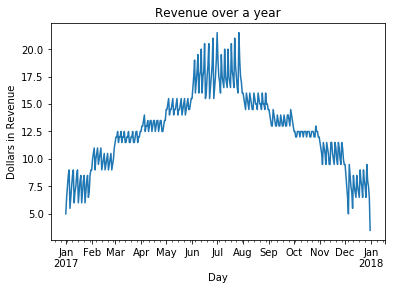

In [7]:
# Let's start exploring by visualizing the data!
sales_over_time = df.Revenue.plot()
sales_over_time.set(xlabel='Day', ylabel='Dollars in Revenue', title='Revenue over a year') 

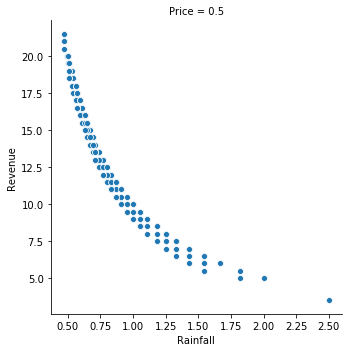

In [8]:
sns.relplot(x='Rainfall', y='Revenue', col='Price', data=df) # There's not a linear relationship, but the curve is clear. More rain and less revenue tend to move together (correlation not causation)

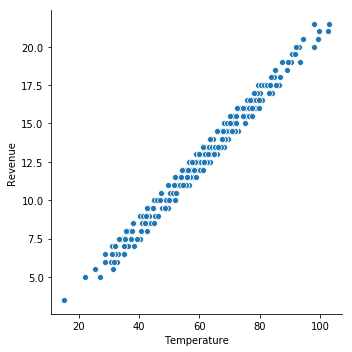

In [9]:
# Explore how Temperature relates to Revenue
sns.relplot(x='Temperature', y='Revenue', data=df) 

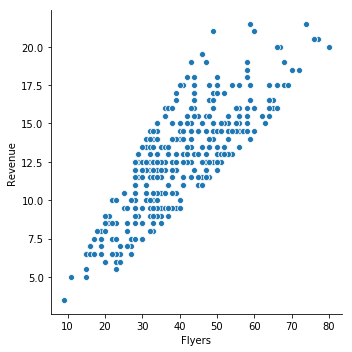

In [10]:
sns.relplot(x='Flyers', y='Revenue', data=df)

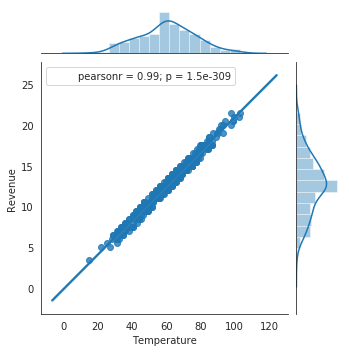

In [11]:
with sns.axes_style('white'):
    j = sns.jointplot("Temperature", "Revenue", data=df, kind='reg', height=5);
    j.annotate(stats.pearsonr)
plt.show()

In [12]:
with sns.axes_style('white'):
    j = sns.jointplot("Flyers", "Revenue", data=df., kind='reg', height=5);
    j.annotate(stats.pearsonr)
plt.show()

SyntaxError: invalid syntax (<ipython-input-12-ccbea2dfcfbb>, line 2)

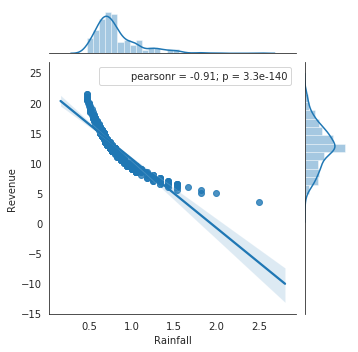

In [13]:
with sns.axes_style('white'):
    j = sns.jointplot("Rainfall", "Revenue", data=df, kind='reg', height=5);
    j.annotate(stats.pearsonr)
plt.show()

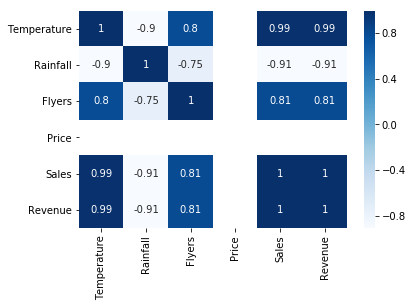

In [14]:
sns.heatmap(df.corr(), cmap='Blues', annot=True)

## Feature engineering
- The target variable called the "dependent variable" here is that revenue number. That's our focus!
- Since "sales units" is 100% correlated and 
- We'll drop the price column because it doesn't vary across the data at all

In [15]:
df = df.drop(columns=["Price", "Sales"])

### Let's visualize the data to look at correlations

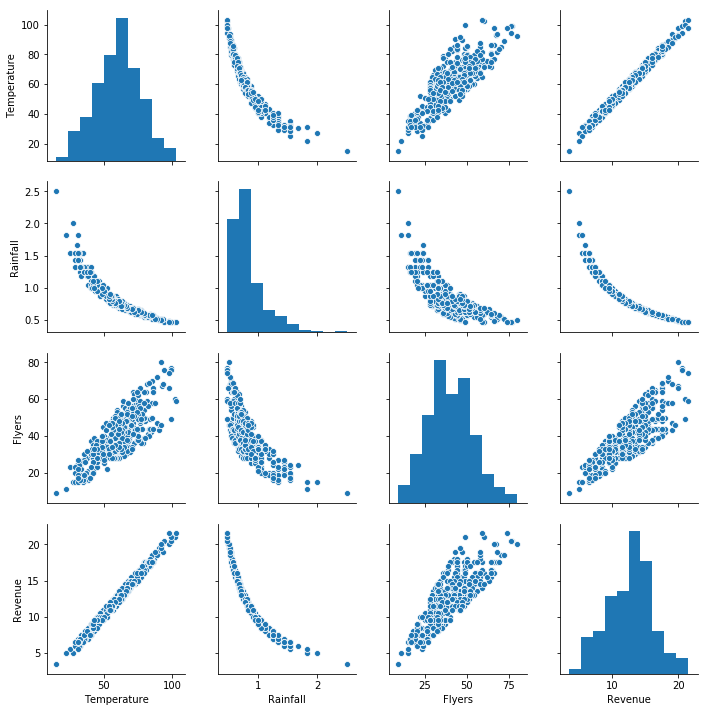

In [16]:
sns.pairplot(df)

### What are the correlation coefficients between each variable?
- Numerically, how tightly does each variable move with each other variable? 

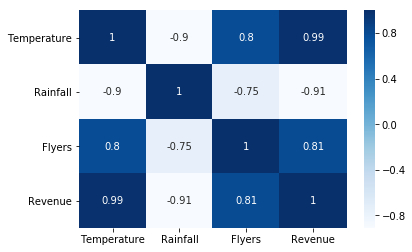

In [17]:
sns.heatmap(df.corr(), cmap='Blues', annot=True)

## So... What's the punchline?
- We're going to need to create a model for Temperature, Rainfall, and Flyers to see how they each contribute to Revenue
- Remember, the CEO doesn't want graphs and numbers, she wants a clear answer to "What do we need to do to increase revenue?"
- We see very clear correlation between temperature and revenue, raitnfall and revenue, and flyers and revenue, but we need to model to learn more
- Let's move onto the next stage with an [intro to linear modeling exercise](https://www.kaggle.com/ryanorsinger/intro-to-linear-modeling-exercise)